In [25]:
import qiskit
from qiskit import QuantumCircuit

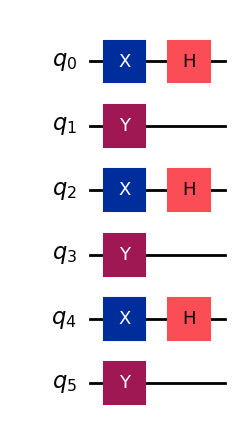

In [26]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.y(1)

qc1 = QuantumCircuit(6)
for i in range(3):
    qc1 = qc1.compose(qc,qubits=[2*i,(2*i + 1)])
qc1.draw("mpl")

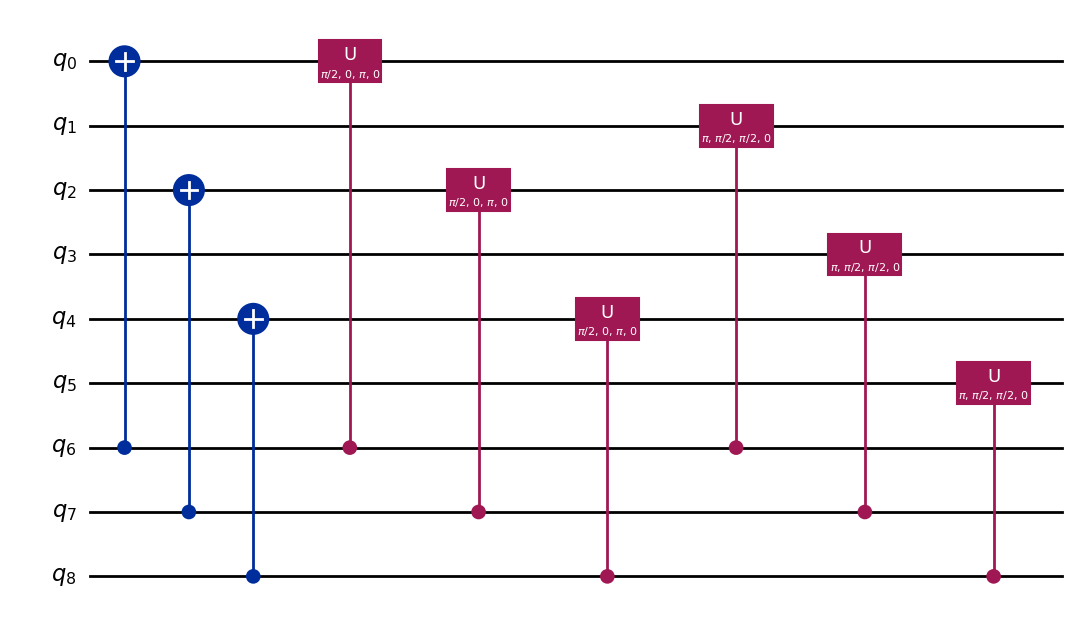

In [31]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.y(1)

qc1 = QuantumCircuit(9)
gate = qc.to_gate().control()
for i in range(3):
    qc1.append(gate,[6+i,2*i,(2*i + 1)])
qc1.draw("mpl")
qc1.decompose().draw("mpl")

In [41]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

qc = QuantumCircuit(2, 2)

qc.h(0)  # Apply Hadamard gate to first qubit
qc.cx(0, 1)  # Apply CNOT gate with control qubit 0 and target qubit 1
qc.h(0)  # Measure qubit 0 along the x-axis
qc.sdg(0)  # Apply S-dagger gate to qubit 0 for y-axis measurement
qc.h(1)  # Measure qubit 1 along the y-axis
qc.sdg(1)  # Apply S-dagger gate to qubit 1 for x-axis measurement

qc.measure([0, 1], [0, 1])  # Measure both qubits
backend = Aer.get_backend('qasm_simulator')  # Use the local simulator
job = backend.run(qc)
result = job.result()
counts = result.get_counts(qc)
correlation = (counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)) / sum(counts.values())
print("Correlation coefficient:", correlation)


Correlation coefficient: 1.0


In [53]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from numpy import pi
from numpy.random import randint

def chsh_game(strategy):
 
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

def chsh_circuit(x, y):

    qc = QuantumCircuit(2,  2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc
'''
print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw(output='mpl', style='iqp'))

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw(output='mpl', style='iqp'))

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw(output='mpl', style='iqp'))

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw(output='mpl', style='iqp'))
'''
sampler = Sampler()

def quantum_strategy(x, y):
    # `shots=1` runs the circuit once
    result = sampler.run(chsh_circuit(x, y), shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.854


Tsirelson bound: 2.0


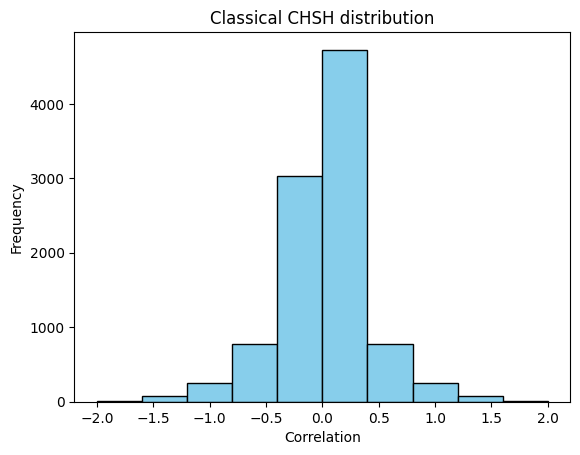

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def chsh(a, b, c, d):
  return (a * b + c * d - a * d - b * c) / 2.0

# Generate random outcomes for the measurements.
a = np.linspace(0.0, 2.0, num=10)
b = np.linspace(0.0, 2.0, num=10)
c = np.linspace(0.0, 2.0, num=10)
d = np.linspace(0.0, 2.0, num=10)
a,b,c,d = np.meshgrid(a,b,c,d)
# Calculate the CHSH Bell inequality.
chsh_value = chsh(a, b, c, d)

# Print the result.
print("Tsirelson bound:", chsh_value.max())
plt.hist(chsh_value.flatten(), bins=10, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Classical CHSH distribution')

# Show plot
plt.show()

1.0


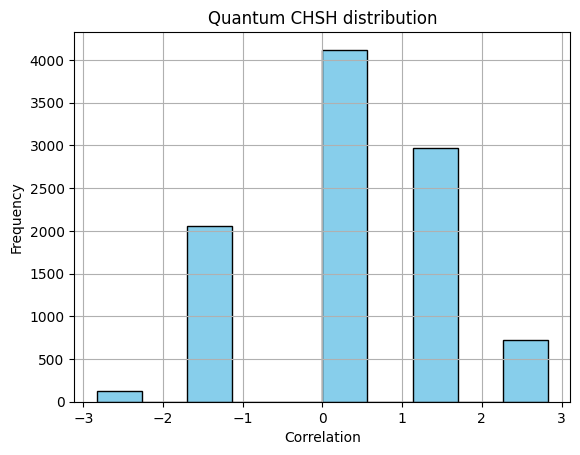

In [35]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a quantum circuit for the CHSH game
def chsh_circuit(x, y):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)

    # Alice's measurement
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-np.pi / 2, 0)
    qc.measure(0, 0)

    # Bob's measurement
    if y == 0:
        qc.ry(-np.pi / 4, 1)
    else:
        qc.ry(np.pi / 4, 1)
    qc.measure(1, 1)
    return qc

# Run the CHSH game with a quantum strategy
def quantum_strategy(x, y, shots=1):
    backend = AerSimulator(method="statevector")
    result = backend.run(chsh_circuit(x, y), shots=shots).result()
    counts = result.get_counts()
    p00 = counts.get("00", 0) / shots
    p01 = counts.get("01", 0) / shots
    p10 = counts.get("10", 0) / shots
    p11 = counts.get("11", 0) / shots
    correlation = p00 - p01 - p10 - p11
    return correlation

# Evaluate Bell's inequality
def evaluate_bells_inequality(strategy):
    bell_value = 0
    for x in range(2):
        for y in range(2):
            correlation = strategy(x, y)
            bell_value += ((-1) ** (x * y)) * correlation/np.sqrt(2)
    return bell_value

n=10000
c=0
b=[]
for i in range(n):
    # Run the CHSH game with the quantum strategy
    bell_value = evaluate_bells_inequality(quantum_strategy)
    b.append(bell_value)
    # Determine if the result violates Bell's inequality
    if np.abs(bell_value) > 2 * np.sqrt(2):
        c+=0
    else:
        c+=1

print(c/n)
import matplotlib.pyplot as plt
plt.hist(b, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Quantum CHSH distribution')
plt.grid(True)
# Show plot
plt.show()


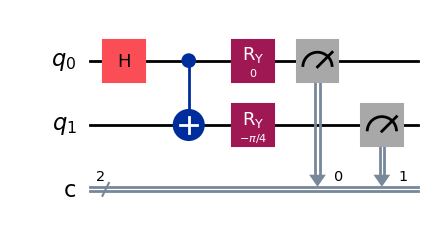

In [36]:
qc = chsh_circuit(0,0)
qc.draw("mpl")


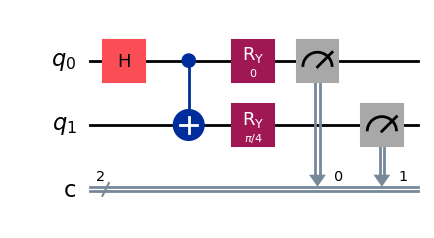

In [37]:
qc = chsh_circuit(0,1)
qc.draw("mpl")

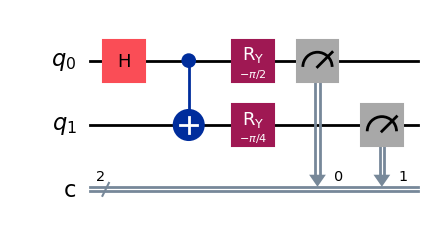

In [38]:
qc = chsh_circuit(1,0)
qc.draw("mpl")

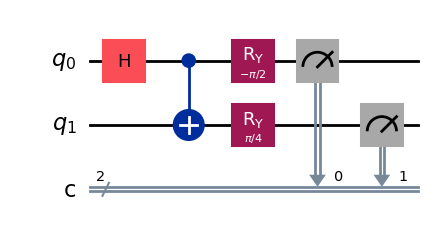

In [39]:
qc = chsh_circuit(1,1)
qc.draw("mpl")

In [33]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a quantum circuit for the CHSH game with 3 qubits
def chsh_circuit(x, y, z):
    qc = QuantumCircuit(3, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)

    # Alice's measurement
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-np.pi / 2, 0)
    qc.measure(0, 0)

    # Bob's measurement
    if y == 0:
        qc.ry(-np.pi / 4, 1)
    else:
        qc.ry(np.pi / 4, 1)
    qc.measure(1, 1)

    # Additional qubit for Charlie's measurement
    if z == 0:
        qc.ry(-np.pi / 6, 2)
    else:
        qc.ry(np.pi / 3, 2)
    qc.measure(2, 1)  # Charlie's measurement is stored in the second classical register

    return qc

# Run the CHSH game with a quantum strategy for 3 qubits
def quantum_strategy(x, y, z, shots=1):
    backend = AerSimulator(method="statevector")
    result = backend.run(chsh_circuit(x, y, z), shots=shots).result()
    counts = result.get_counts()
    p00 = counts.get("00", 0) / shots
    p01 = counts.get("01", 0) / shots
    p10 = counts.get("10", 0) / shots
    p11 = counts.get("11", 0) / shots
    correlation = p00 - p01 - p10 - p11
    return correlation

# Evaluate Bell's inequality for 3 qubits
def evaluate_bells_inequality(strategy):
    bell_value = 0
    for x in range(2):
        for y in range(2):
            for z in range(2):
                correlation = strategy(x, y, z)
                bell_value += ((-1) ** (x * y * z)) * correlation/np.sqrt(3)
    return bell_value

n=1000
c=0
b=[]
for i in range(n):
    # Run the CHSH game with the quantum strategy
    bell_value = evaluate_bells_inequality(quantum_strategy)
    b.append(bell_value)
    # Determine if the result violates Bell's inequality
    if np.abs(bell_value) > 4:
        c+=0
    else:
        c+=1

print(c/n)


0.987


{'111': 482, '000': 518}


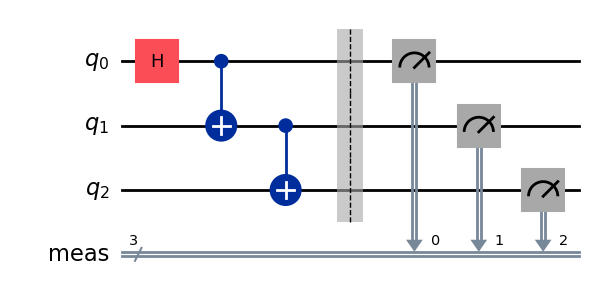

In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a Quantum Circuit with 3 qubits
qc = QuantumCircuit(3)

# Apply Hadamard gate on the first qubit
qc.h(0)

# Apply CNOT gates
qc.cx(0, 1)
qc.cx(1, 2)

# Measure the qubits
qc.measure_all()

# Use Qiskit's Aer simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
tqc = transpile(qc, simulator)

# Execute the circuit on the simulator
job = simulator.run(tqc, shots=1000)

# Grab the results from the job
result = job.result()

# Get the counts (results) from the result object
counts = result.get_counts(qc)

# Print the counts
print(counts)

qc.draw("mpl")

100%|██████████| 10000/10000 [02:57<00:00, 56.41it/s]


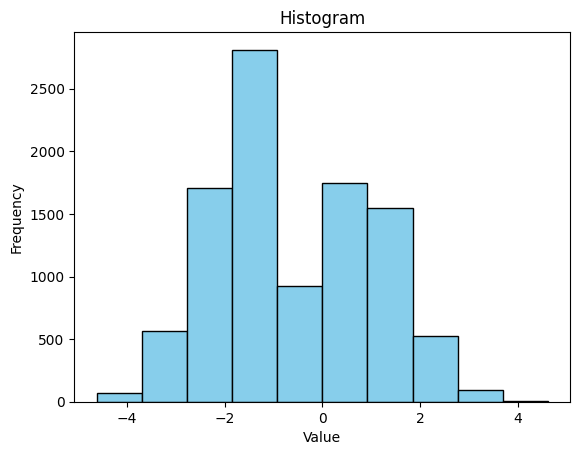

In [31]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from tqdm import tqdm
import numpy as np
# Create a quantum circuit for the CHSH game with 3 particles
def chsh_circuit(x, y, z):
    qc = QuantumCircuit(3, 3)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)

    # Alice's measurement
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-np.pi / 2, 0)
    qc.measure(0, 0)

    # Bob's measurement
    if y == 0:
        qc.ry(-np.pi / 4, 1)
    else:
        qc.ry(np.pi / 4, 1)
    qc.measure(1, 1)

    # Charlie's measurement
    if z == 0:
        qc.ry(-np.pi / 4, 2)
    else:
        qc.ry(np.pi / 4, 2)
    qc.measure(2, 2)

    return qc

# Run the CHSH game with a quantum strategy for 3 particles
def quantum_strategy(x, y, z, shots=1):
    backend = AerSimulator(method="statevector")
    result = backend.run(chsh_circuit(x, y, z), shots=shots).result()
    counts = result.get_counts()
    p000 = counts.get("000", 0) / shots
    p001 = counts.get("001", 0) / shots
    p010 = counts.get("010", 0) / shots
    p011 = counts.get("011", 0) / shots
    p100 = counts.get("100", 0) / shots
    p101 = counts.get("101", 0) / shots
    p110 = counts.get("110", 0) / shots
    p111 = counts.get("111", 0) / shots
    correlation = p000 - p001 - p010 + p011 - p100 + p101 + p110 - p111
    return correlation

# Evaluate Bell's inequality for 3 particles
def evaluate_bells_inequality(strategy):
    bell_value = 0
    for x in range(2):
        for y in range(2):
            for z in range(2):
                correlation = strategy(x, y, z)
                bell_value += 1/1.732*((-1) ** (x * y * z)) * correlation
    return bell_value

n=10000
b=[]
for i in tqdm(range(n)):
    # Run the CHSH game with the quantum strategy
    bell_value = evaluate_bells_inequality(quantum_strategy)
    b.append(bell_value)

import matplotlib.pyplot as plt
plt.hist(b, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Quantum CHSH distribution(3 spin-1/2)')
plt.grid(True)

# Show plot
plt.show()

Measurement results of the GHZ state:
{'101': 1255, '100': 1291, '010': 1204, '000': 1258, '011': 1220, '110': 1235, '111': 1274, '001': 1263}


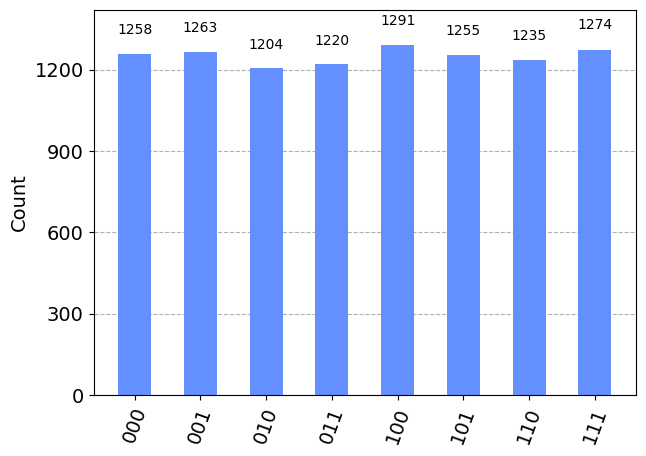

In [60]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 3 qubits
ghz_circuit = QuantumCircuit(3, 3)

# Apply Hadamard gate to the first qubit to create superposition
ghz_circuit.h(0)

# Apply CNOT gates to entangle all three qubits
ghz_circuit.cx(0, 1)
ghz_circuit.cx(1, 2)

# Change measurement basis for each qubit
# For simplicity, we'll measure in the X basis for all qubits
# In a real experiment, you would change these to match the desired measurement
ghz_circuit.rx(np.pi/2,0)
ghz_circuit.ry(np.pi/2,1)
ghz_circuit.ry(np.pi/2,2)
# Measure the qubits
ghz_circuit.measure([0, 1, 2], [0, 1, 2])

# Use Qiskit's Aer simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
tqc = transpile(ghz_circuit, simulator)

# Execute the circuit on the simulator
job = simulator.run(tqc, shots=10000)

# Grab the results from the job
result = job.result()

# Get the counts (results) from the result object
counts = result.get_counts(ghz_circuit)

# Print the measurement results
print("Measurement results of the GHZ state:")
print(counts)

# Plot the results
plot_histogram(counts)


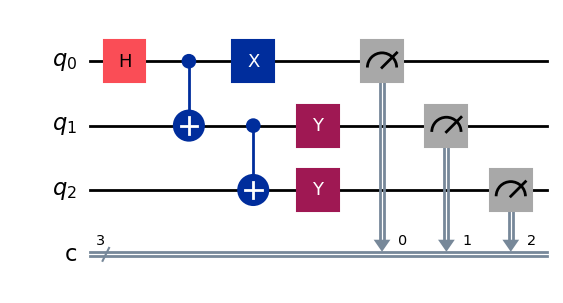

In [41]:
ghz_circuit.draw("mpl")

Measurement results of the GHZ state:
{'011': 2446, '000': 2552, '101': 2597, '110': 2405}


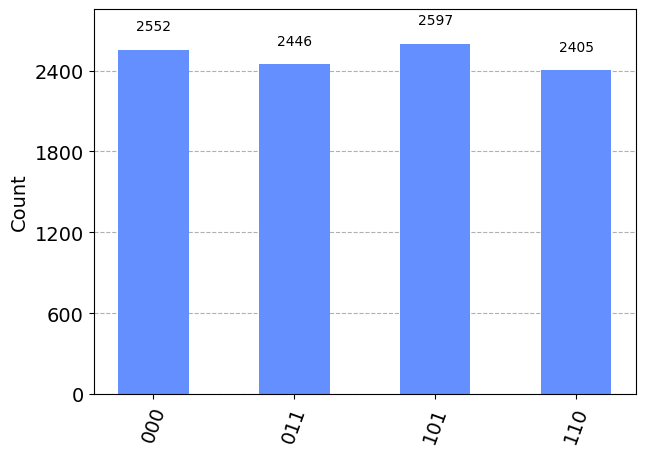

In [68]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit with 3 qubits
qc = QuantumCircuit(3, 3)

# Apply Hadamard gate to the first qubit to create superposition
qc.h(0)

# Apply CNOT gates to entangle the qubits
qc.cx(0, 1)
qc.cx(1, 2)

# Apply Pauli-X gate (45° linear polarizer) to qubit 0
qc.h(0)
qc.t(0)

# Apply Pauli-Y gate (circular polarizer) to qubits 1 and 2
qc.h(1)
qc.s(1)
qc.h(2)
qc.s(2)


# Measure all qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Use Qiskit's Aer simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
tqc = transpile(qc, simulator)

# Execute the circuit on the simulator
job = simulator.run(tqc, shots=10000)

# Grab the results from the job
result = job.result()

# Get the counts (results) from the result object
counts = result.get_counts(qc)

# Print the measurement results
print("Measurement results of the GHZ state:")
print(counts)

# Plot the results
plot_histogram(counts)


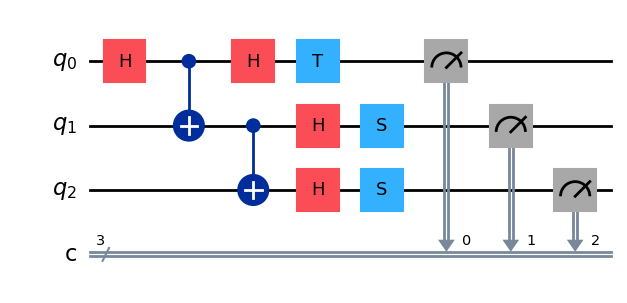

In [66]:
qc.draw("mpl")

In [27]:
import numpy as np
import qutip as qt

# Define the basis states for spin-1 particles
spin_0 = qt.basis(3, 0)  # |0>
spin_1 = qt.basis(3, 1)  # |1>
spin_minus1 = qt.basis(3, 2)  # |-1>

# Define the Pauli spin operators for each particle
sigma_x = qt.jmat(1, 'x')
sigma_y = qt.jmat(1, 'y')
sigma_z = qt.jmat(1, 'z')

# Define the observables for each particle
A1 = sigma_x
A2 = (1/np.sqrt(2)) * (sigma_x + sigma_y)
A3 = (1/np.sqrt(2)) * (sigma_x - sigma_y)

B1 = sigma_z
B2 = (1/np.sqrt(2)) * (sigma_z + sigma_y)
B3 = (1/np.sqrt(2)) * (sigma_z - sigma_y)

# Define the Bell state (maximally entangled state)
psi_minus = (qt.tensor(spin_0, spin_0) - qt.tensor(spin_1, spin_1)).unit()

# Calculate the expectation values for each observable
expect_A1 = qt.expect(qt.tensor(A1, qt.qeye(3)), psi_minus)
expect_A2 = qt.expect(qt.tensor(A2, qt.qeye(3)), psi_minus)
expect_A3 = qt.expect(qt.tensor(A3, qt.qeye(3)), psi_minus)

expect_B1 = qt.expect(qt.tensor(qt.qeye(3), B1), psi_minus)
expect_B2 = qt.expect(qt.tensor(qt.qeye(3), B2), psi_minus)
expect_B3 = qt.expect(qt.tensor(qt.qeye(3), B3), psi_minus)

# Calculate the Mermin operator
M = expect_A1 * expect_B1 + expect_A2 * expect_B2 + expect_A3 * expect_B3

# Calculate the Mermin bound
Mermin_bound = 2 * np.sqrt(2)

print("Mermin bound:", Mermin_bound)
print("Measured Mermin value:", M)


Mermin bound: 2.8284271247461903
Measured Mermin value: 0.0
